In [1]:
using Mamba
using Pandas

In [2]:
# Data
FP = open(raw"./data-salary.txt")
Data = read_csv(FP)
close(FP)
Data

     X     Y
0   24   472
1   24   403
2   26   454
3   32   575
4   33   546
5   35   781
6   38   750
7   40   601
8   40   814
9   43   792
10  43   745
11  44   837
12  48   868
13  52   988
14  56  1092
15  56  1007
16  57  1233
17  58  1202
18  59  1123
19  59  1314


```stan
data {
    int N;
    real X[N];
    real Y[N];
}

paramters {
    real a;
    real b;
    real<lower=0> sigma;
}

model{
    for (n in 1:N) {
        Y[n] ~ normal(a + b*X[n], sigma);
    }
}
```

In [3]:
# Model Definition
model = Model(
    y = Stochastic(1,
        (a, b, x, sigma) -> MvNormal(a + b*x, sigma),
        false
    ),
    b = Stochastic(() -> Normal(0, 100)),
    a = Stochastic(() -> Normal(0, 100)),
    sigma = Stochastic(() -> Rayleigh(100))
)

Object of type "Mamba.Model"
-------------------------------------------------------------------------------
a:
A monitored node of type "Mamba.ScalarStochastic"
NaN
-------------------------------------------------------------------------------
b:
A monitored node of type "Mamba.ScalarStochastic"
NaN
-------------------------------------------------------------------------------
y:
An unmonitored node of type "0-element Mamba.ArrayStochastic{1}"
Float64[]
-------------------------------------------------------------------------------
sigma:
A monitored node of type "Mamba.ScalarStochastic"
NaN


In [4]:
## Sampling Scheme
scheme = [NUTS(:a), NUTS(:b),Slice(:sigma,10)]
setsamplers!(model, scheme)

Object of type "Mamba.Model"
-------------------------------------------------------------------------------
a:
A monitored node of type "Mamba.ScalarStochastic"
NaN
-------------------------------------------------------------------------------
b:
A monitored node of type "Mamba.ScalarStochastic"
NaN
-------------------------------------------------------------------------------
y:
An unmonitored node of type "0-element Mamba.ArrayStochastic{1}"
Float64[]
-------------------------------------------------------------------------------
sigma:
A monitored node of type "Mamba.ScalarStochastic"
NaN


In [5]:
# Data Conversion
Dat = Dict{Symbol, Any}(
    :x => Array(Data[:X]),
    :y => Array(Data[:Y])
)

Dict{Symbol,Any} with 2 entries:
  :y => [472, 403, 454, 575, 546, 781, 750, 601, 814, 792, 745, 837, 868, 988, …
  :x => [24, 24, 26, 32, 33, 35, 38, 40, 40, 43, 43, 44, 48, 52, 56, 56, 57, 58…

In [6]:
# Initial Values
inits = [
  Dict{Symbol, Any}(
    :y => Dat[:y],
    :a => rand(Normal(0, 1)),
    :b => rand(Normal(0, 1)),
    :sigma => rand(Rayleigh(1))
  ) for i in 1:4
]

4-element Array{Dict{Symbol,Any},1}:
 Dict{Symbol,Any}(Pair{Symbol,Any}(:a, 0.0321085),Pair{Symbol,Any}(:b, -1.13885),Pair{Symbol,Any}(:y, [472, 403, 454, 575, 546, 781, 750, 601, 814, 792, 745, 837, 868, 988, 1092, 1007, 1233, 1202, 1123, 1314]),Pair{Symbol,Any}(:sigma, 1.38256))  
 Dict{Symbol,Any}(Pair{Symbol,Any}(:a, -0.402152),Pair{Symbol,Any}(:b, -0.365622),Pair{Symbol,Any}(:y, [472, 403, 454, 575, 546, 781, 750, 601, 814, 792, 745, 837, 868, 988, 1092, 1007, 1233, 1202, 1123, 1314]),Pair{Symbol,Any}(:sigma, 0.723508))
 Dict{Symbol,Any}(Pair{Symbol,Any}(:a, -0.40549),Pair{Symbol,Any}(:b, 1.02008),Pair{Symbol,Any}(:y, [472, 403, 454, 575, 546, 781, 750, 601, 814, 792, 745, 837, 868, 988, 1092, 1007, 1233, 1202, 1123, 1314]),Pair{Symbol,Any}(:sigma, 1.82913))    
 Dict{Symbol,Any}(Pair{Symbol,Any}(:a, -0.349698),Pair{Symbol,Any}(:b, 0.66123),Pair{Symbol,Any}(:y, [472, 403, 454, 575, 546, 781, 750, 601, 814, 792, 745, 837, 868, 988, 1092, 1007, 1233, 1202, 1123, 1314]),Pair{Symbol,A

In [7]:
## MCMC Simulations
sim = mcmc(model, Dat, inits, 4000, burnin=2000, thin=1, chains=4)
Mamba.describe(sim)

MCMC Simulation of 4000 Iterations x 4 Chains...

Chain 1:   0% [0:14:45 of 0:14:47 remaining]
Chain 1:  10% [0:00:23 of 0:00:25 remaining]
Chain 1:  20% [0:00:11 of 0:00:14 remaining]
Chain 1:  30% [0:00:07 of 0:00:10 remaining]
Chain 1:  40% [0:00:05 of 0:00:08 remaining]
Chain 1:  50% [0:00:03 of 0:00:06 remaining]
Chain 1:  60% [0:00:02 of 0:00:06 remaining]
Chain 1:  70% [0:00:02 of 0:00:05 remaining]
Chain 1:  80% [0:00:01 of 0:00:05 remaining]
Chain 1:  90% [0:00:00 of 0:00:05 remaining]
Chain 1: 100% [0:00:00 of 0:00:04 remaining]

Chain 2:   0% [0:00:02 of 0:00:02 remaining]
Chain 2:  10% [0:00:03 of 0:00:03 remaining]
Chain 2:  20% [0:00:02 of 0:00:02 remaining]
Chain 2:  30% [0:00:02 of 0:00:02 remaining]
Chain 2:  40% [0:00:01 of 0:00:02 remaining]
Chain 2:  50% [0:00:01 of 0:00:02 remaining]
Chain 2:  60% [0:00:01 of 0:00:02 remaining]
Chain 2:  70% [0:00:01 of 0:00:02 remaining]
Chain 2:  80% [0:00:00 of 0:00:02 remaining]
Chain 2:  90% [0:00:00 of 0:00:02 remaining]
Chai

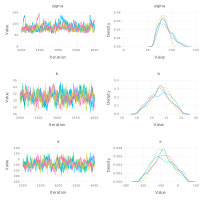

In [10]:
p = Mamba.plot(sim)
draw(p)

In [11]:
using Plots
gr()
Plots.plot(Dat[:x],Dat[:y],st=:scatter)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 30 
 
 
 40 
 
 
 50 
 
 
 60 
 
 
 400 
 
 
 600 
 
 
 800 
 
 
 1000 
 
 
 1200 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 y1